Introduction

In our approach and solution, you will see that we have taken into account all the data inputs that need to be made for defensive coordinator to call the best possible play to defeat the offense. We have focused on what is in control of the defensive coordinator, which is what coverage to call given the situation and offensive personnel. We have done this by breaking down the below decision tree: 

Situation + + offense player personnel + anticipated offense play call (route tree) + best defensive coverage = defensive decision

This is even more important when looking at pass plays as they’re being used to pinpoint weak spots on the field and create mis match opportunities for the offense skill players with defensive skill position players. 


Technical Introduction


Our approach was to predict man/zone coverage for all 17 weeks and provide insight into how a defensive coordinator could use the information when preparing for the game. To achieve this we focused on where the offense is on the field (redzone, 20-50, and greater than 50); the offensive team performance using average EPA; and targeted reciever performance using average EPA.

For this submission, we want to identify Man/Zone coverage probabilities using an XGBoost model using @tombliss's coverage data and for nearly all week 1 plays. The data was converted to man/zone and the accuracy was approximately 85%.

The feaurure development approach uses the min distance concepts @AndikaRachman's notebook of "Identifying Coverage Scheme Among Defensive Backs". We use the same concept for distance calculation but found the distribution of min distance for offensive players at the ball snap was predictive. Also predictive was distribution of defensive players by position of distance from line of scrimage by position. Also predictive was where you are on the field (distance to goal). We are greatful for @tombliss's coverage data and for nearly all week 1 plays and target data for all weeks.

Example

The concept would be to create a tool using average EPA cut by man vs zone, then different teams, situations (down and distance) and offensive players. This information can then be used in planning by a defensive coordinator. Below is one example of many.

0= MAN 1= Zone Lower # is better for the defese

Once we understand the performance of zone and man coverage, a defensive coordinator can use that information to make a more informed play calling decision. What we wanted to understand is, does the situation impact when you should call a zone defense or man defense. One of the most important situations is where you’re on the field, which we broke down into greater than 50 yards from the end zone, between 20 and 50 yards from the end zone and then the red zone. We evaluated the EPA of these situations by team to see who performs better when. What we found and what you will see is that given where a team is on the field does have an impact the performance based on EPA therefore a team should adjust their play calling given the location on the field

If we look at three team, the Arizona Cardinals, Green Bay Packers and Kansas Chiefs, we will see how understanding a team’s EPA performance between man and zone given where they’re on the field should be taken into consideration when making a game plan and calling plays. 

The league average EPA for man coverage is 0.162716 whereas for zone coverage the average is -0.039572. 

Arizona Cardinals: 
Please see the below EPA results for the Arizona Cardinals: 

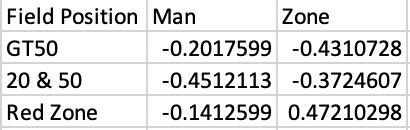

What this means, is that when defending the Cardinal’s the difference between a zone and man coverage play call when not in the red zone isn’t as significant as when you’re in the red zone. The Cardinals had 25 plays against zone coverage and 30 against man coverage in red zone. As you can see above, the offense greatly outperformed against zone with and EPA of 0.47210298, while against man coverage the EPA was -0.1412599. When the Cardinals are in the red zone, to defend the pass a defense should play man coverage. If they do this, this will improve the EPA by over a half a point. 

Green Bay Packers: Please see the below EPA results for the Green Bay Packers:

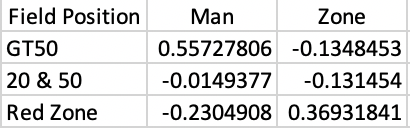

As a defensive coordinator playing Green Bay, when you’re still in GB’s territory you should run zone coverage as the EPA of zone is over a half point better (0.68). When GB is in your territory but not in the red zone (20 and 50 yard line) it is not as significant what coverage you’re in. But in the red zone, GB had 45 plays against man and 36 against zone. The EPA against man was far better for the defense with -0.2304908 while zone was 0.3693184. So as a defensive coordinator I would want to be running man coverage against GB.

Kansas City Chiefs: Please see the below EPA results for the Kansas City Chiefs:

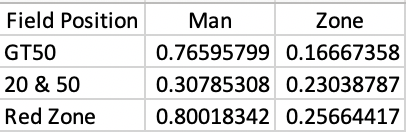

One of the most successful offenses passing was the Kansas City Chiefs. As you can see they’re above the league average by a significant margin in every field position situation. What stands out the most is the EPA difference between Man and Zone when greater than 50 yards out and in the red zone. When greater than 50 yards out defensive opponents ran 72 plays with man coverage and 222 with zone. In the red zone defensive opponents ran 45 man plays and 63 zone plays.

What this means? When playing the Chief’s when you run zone in both situations your defensive EPA will improve by over half a point therefore the play calling mix should be heavier weighted towards zone.

Player Personnel: 
When looking the Chief’s offense, their results also makes sense when you factor in their offensive player personnel, specifically at receiver. The Chiefs top 4 receivers were Travis Kelce, Tyreek Hill, Sammy Watkins and Chris Conley. If we look specifically at the receivers (Hill, Watkins, Conley) what we know about them is that they’re speed receivers, all have a 40 yard time of 4.35 and below with Hill at 4.29. When you have speed like this, it is very difficult to defend man to man as a DB cant keep up, as you can see in the data. 

As you can see from the data below, all three players performed better against man coverage. This was especially true for Sammy Watkins and Tyreek Hill. 

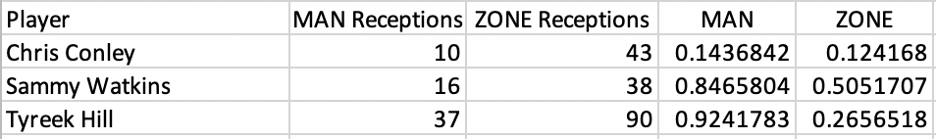

What this means for a defensive coordinator? When playing these receivers and speed first receivers in general you should employ a zone defense. One of the reasons being, these receivers are hard to cover step by step with their speed, especially when running deep routes. 

For example, Tyreek Hill had an EPA of 0.9241783 against man coverage while also running xx% of go route plays. With that many go routes and that speed as a defense you want support over the top from safeties. The best way to get this is with zone coverage. 


Tyreek Hill Routes Run
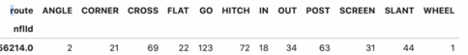

The same can be said for Sammy Watkins:
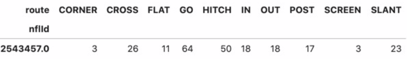

As you can see the KC offense is making the most of their personnel’s speed, so a defensive coordinator you need to do what’s in your control and run a zone defense to get more help. 

Now when you look at a player like Deandre Hopkins who is a more possession receiver, you see that their performance against zone is actually better. The routes they run are better suited to a possession receiver rather than a receiver reliant on speed. Therefore as a defense coordinator you can consider man coverage to gain a competive advantage.

Deandre Hopkins:
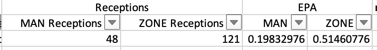

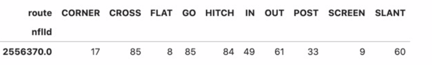

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Import data sets
coverages = pd.read_csv('../input/nfl-big-data-bowl-2021-bonus/coverages_week1.csv')
targets = pd.read_csv('../input/nfl-big-data-bowl-2021-bonus/targetedReceiver.csv')
players = pd.read_csv('../input/nfl-big-data-bowl-2021//players.csv')
games = pd.read_csv('../input/nfl-big-data-bowl-2021//games.csv')
plays = pd.read_csv('../input/nfl-big-data-bowl-2021/plays.csv')
week1 = pd.read_csv('../input/nfl-big-data-bowl-2021/week1.csv')
week2 = pd.read_csv('../input/nfl-big-data-bowl-2021/week2.csv')
week3 = pd.read_csv('../input/nfl-big-data-bowl-2021/week3.csv')
week4 = pd.read_csv('../input/nfl-big-data-bowl-2021/week4.csv')
week5 = pd.read_csv('../input/nfl-big-data-bowl-2021/week5.csv')
week6 = pd.read_csv('../input/nfl-big-data-bowl-2021/week6.csv')
week7 = pd.read_csv('../input/nfl-big-data-bowl-2021/week7.csv')
week8 = pd.read_csv('../input/nfl-big-data-bowl-2021/week8.csv')
week9 = pd.read_csv('../input/nfl-big-data-bowl-2021/week9.csv')
week10 = pd.read_csv('../input/nfl-big-data-bowl-2021/week10.csv')
week11 = pd.read_csv('../input/nfl-big-data-bowl-2021/week11.csv')
week12 = pd.read_csv('../input/nfl-big-data-bowl-2021/week12.csv')
week13 = pd.read_csv('../input/nfl-big-data-bowl-2021/week13.csv')
week14 = pd.read_csv('../input/nfl-big-data-bowl-2021/week14.csv')
week15 = pd.read_csv('../input/nfl-big-data-bowl-2021/week15.csv')
week16 = pd.read_csv('../input/nfl-big-data-bowl-2021/week16.csv')
week17 = pd.read_csv('../input/nfl-big-data-bowl-2021/week17.csv')

In [ ]:
#Feature creation
week = pd.concat([week1, week2, week3, week4, week5, week6,week7, week8, week9,week10,week11,week12,week13,week14,week15,week16,week17], ignore_index=True)
weekMod = week[week.event =='pass_forward']
weekMod.shape

In [ ]:
#min distance feature at pass forward
groupedWeek = weekMod.groupby(['gameId', 'playId', 'frameId'])
playerXY = {}
for name, group in groupedWeek:
    playerXY[name] = []
    for row in group.iterrows():
        data = [row[1]['nflId'], row[1]['team'], row[1]['x'], row[1]['y'], row[1]['dir']]
        playerXY[name].append(data)

features = list(weekMod.columns)
weekArray = np.array(weekMod)
minOppDist = []
for player in weekArray:
    if player[features.index('team')] != 'football':
        opponentPositions = playerXY[(player[features.index('gameId')], player[features.index('playId')], player[features.index('frameId')])]
        distances = []
        directions = []
        opponents = []
        xs = []
        ys = []
        try:
            for oppPos in opponentPositions: 
                if player[features.index('team')] != oppPos[1] and player[features.index('team')] != 'football' and oppPos[1] != 'football':
                    dx = (player[features.index('x')] - oppPos[2])**2
                    dy = (player[features.index('y')] - oppPos[3])**2
                    dist = np.sqrt(dx+dy)
                    distances.append(dist)
                    directions.append(oppPos[4])
                    opponents.append(oppPos[0])
                    xs.append(oppPos[2])
                    ys.append(oppPos[3])
            minDist = min(distances)
            closestOpponent = opponents[np.argmin(distances)]
            opponentDir = directions[np.argmin(distances)]
            opponentX = xs[np.argmin(distances)]
            opponentY = ys[np.argmin(distances)]
            summary = [player[features.index('gameId')], player[features.index('playId')], player[features.index('frameId')], player[features.index('nflId')], minDist, closestOpponent, opponentDir, opponentX, opponentY]
            minOppDist.append(summary)
        except:
            pass

In [ ]:
#min distance variables for input into model
minOppDist = pd.DataFrame(minOppDist, columns=['gameId', 'playId', 'frameId', 'nflId', 'oppMinDist', 'closestOpp(nflId)', 'oppDir', 'oppX', 'oppY'])
minDist = weekMod[['playId','gameId','nflId','frameId', 'position']]
minOpp = minOppDist[['playId','gameId','nflId','frameId', 'oppMinDist']]
minDist1 = pd.merge(minOpp,minDist, how="left", on=['playId','gameId','nflId','frameId',])
minDist1.copy()
minDist1['id']= minDist1['gameId'].astype(str) + minDist1['playId'].astype(str)
minDist2 = minDist1[minDist1["position"].isin(['RB','TE','WR'])]
routeDist1 = minDist2[['id','oppMinDist']]
routeDist1.copy()
routeDistVar = routeDist1.groupby('id')['oppMinDist'].describe()
routeDistVar.reset_index(inplace=True)
routeDistVar.columns = ['id','countDist','meanDist','stdDist','minDist','25%Dist','50%Dist','75%Dist','maxDist']
routeDistVar.columns

In [ ]:
# where you are on the field and defense variable creation at ball snap

plays1= pd.merge(coverages,plays, how="left", on=['gameId','playId'])
plays1.columns
plays2 = plays1[['gameId','playId','absoluteYardlineNumber']]
plays2.head()
plays_games = pd.merge(plays, games, how="outer", on=["gameId"])
plays_games1 = plays_games[['gameId','playId','possessionTeam','homeTeamAbbr','visitorTeamAbbr']]
week1 = week[week.event == 'ball_snap']
plays_games2 = pd.merge(week1,plays_games1, how="outer", on=['gameId','playId'])
plays_games2.groupby('position')['playId'].count()
conditions = [
    (plays_games2['team'] == 'home') & (plays_games2['possessionTeam'] == plays_games2['homeTeamAbbr']),
    (plays_games2['team'] == 'home') & (plays_games2['possessionTeam'] == plays_games2['visitorTeamAbbr']),
    (plays_games2['team'] == 'away') & (plays_games2['possessionTeam'] == plays_games2['visitorTeamAbbr']),
    (plays_games2['team'] == 'away') & (plays_games2['possessionTeam'] == plays_games2['homeTeamAbbr']),
    ]
values = ['offense', 'defense', 'offense', 'defense']

# create a new column and use np.select to assign values to it using our lists as arguments
plays_games2['personel'] = np.select(conditions, values)

In [ ]:
# display updated DataFrame
plays_games2.head()
plays_games3 = pd.merge(plays2,plays_games2, how="outer", on=['gameId','playId'])
plays_games4 = plays_games3[plays_games3.personel == 'defense']
plays_games5 = plays_games4[['gameId','playId','x','absoluteYardlineNumber','position']]
plays_games5.head()
plays_games6 = plays_games5
plays_games6 = plays_games6.copy()
plays_games6['posGroup'] = plays_games6['position']
plays_games6['posGroup'] = plays_games6['posGroup'].replace(['ILB','MLB','OLB','DB','FS','SS','DE','DL','NT','TE'],
                                                            ['LB','LB','LB','CB','S','S','LB','LB','LB','LB'])
plays_games6.head(10)
plays_games6 = plays_games6[-plays_games6["posGroup"].isin(['DT','FB','QB','WR','RB'])]
plays_games6.copy()
plays_games6.groupby('posGroup')['playId'].count()
plays_games6['snapDist']= abs(plays_games6['x']-plays_games6['absoluteYardlineNumber'])
plays_games6.head()
plays_games6['id']=plays_games6['gameId'].astype(str)+plays_games6['playId'].astype(str)
plays_games6_sum = plays_games6.groupby(['id','posGroup']).agg({'snapDist': ['count','mean', 'min', 'max']}).unstack()
plays_games6_sum.head()

plays_games6_sum.reset_index(inplace=True)
plays_games6_sum.columns = ['id','countCB','countLB','countS','meanCB','meanLB','meanS','minCB','minLB','minS',
                           'maxCB','maxLB','maxS']
plays_games6_sum.head()

yardsGoal = plays[['gameId','playId','possessionTeam','yardlineSide','yardlineNumber']]
yardsGoal = yardsGoal.copy()
yardsGoal['yardsToGoal'] = np.where(yardsGoal['possessionTeam'] == yardsGoal['yardlineSide'],
                                    100-yardsGoal['yardlineNumber'], yardsGoal['yardlineNumber'])
yardsGoal.head()

yardsGoal['id']= yardsGoal['gameId'].astype(str) + yardsGoal['playId'].astype(str)
yardsGoal.head()
yardsGoal1 = yardsGoal[['id','yardsToGoal']]
yardsGoal1.copy()
yardsGoal1.head()

plays_games7_sum = pd.merge(plays_games6_sum, yardsGoal1, how="left", on=["id"])
plays_games8_sum = pd.merge(plays_games7_sum, routeDistVar, how="left", on=["id"])
plays_games8_sum.head()

In [ ]:
#convert coverages into zone vs man
coverages['id']=coverages['gameId'].astype(str)+coverages['playId'].astype(str)
conditions1 = [
    coverages['coverage'] == 'Cover 0 Man',
    coverages['coverage'] == 'Cover 1 Man',
    coverages['coverage'] == 'Cover 2 Man',
    coverages['coverage'] == 'Cover 2 Zone',
    coverages['coverage'] == 'Cover 3 Zone',
    coverages['coverage'] == 'Cover 4 Zone',
    coverages['coverage'] == 'Cover 6 Zone',
    coverages['coverage'] == 'Prevent Zone']
values1 = [0,0,0,1,1,1,1,1]

# create a new column and use np.select to assign values to it using our lists as arguments
coverages['zone'] = np.select(conditions1, values1)
coverages1 = coverages[['id','zone']]
# display updated DataFrame
coverages1.head()

In [ ]:
#joining data sets
plays_games7_sum = pd.merge(plays_games6_sum, yardsGoal1, how="left", on=["id"])
plays_games8_sum = pd.merge(plays_games7_sum, routeDistVar, how="left", on=["id"])
plays_games8_sum.shape

In [ ]:
#modeling data set
data = pd.merge(plays_games8_sum, coverages1, how="right", on=["id"])
data.dropna()
data.shape
data.columns

In [ ]:
# model

X=data[['countCB', 'countLB', 'countS', 'meanCB', 'meanLB', 'meanS',
       'minCB', 'minLB', 'minS', 'maxCB', 'maxLB', 'maxS', 'yardsToGoal',
       'countDist', 'meanDist', 'stdDist', 'minDist', '25%Dist', '50%Dist',
       '75%Dist', 'maxDist',]]  # Features
y=data['zone']  # Labels


import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)
param = {
    'eta': 0.05, 
    'max_depth': 2,
    'objective': 'multi:softprob',
    'min_child_weight':1,
    'subsample': .8,
    'tree_method': 'hist',
    'colsample_bytree': 1.0,
    'num_class': 2} 

steps = 100  # The number of training iterations
model = xgb.train(param, D_train, steps)
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

In [ ]:
#scoring total data set
X1=plays_games8_sum[['countCB', 'countLB', 'countS', 'meanCB', 'meanLB', 'meanS',
       'minCB', 'minLB', 'minS', 'maxCB', 'maxLB', 'maxS', 'yardsToGoal',
       'countDist', 'meanDist', 'stdDist', 'minDist', '25%Dist', '50%Dist',
       '75%Dist', 'maxDist',]] 
X1.shape

D1 = xgb.DMatrix(X1)
yPreds = model.predict(D1)
yPreds_dataframe = pd.DataFrame(yPreds)      

yPreds_dataframe.columns = ['man', 'zone']
yPreds_dataframe.copy()

result = pd.concat([plays_games8_sum, yPreds_dataframe], axis=1)
result1= result[['id','zone']]

result1.head()
result2 = result1.round()
result2.head()
plays['id']= plays['gameId'].astype(str) + plays['playId'].astype(str)
playsZone =  pd.merge(plays,result2, how="left", on=["id"])
playsZone.head()

In [ ]:
playsZone.groupby('zone')['epa'].mean()

In [ ]:
playsZone.groupby('possessionTeam')['epa'].mean()

In [ ]:
playsZone.groupby(['possessionTeam','zone'])['epa'].mean().unstack()

In [ ]:
targets['id']= targets['gameId'].astype(str) + targets['playId'].astype(str)
targets['nflId']=targets['targetNflId']
targets.copy()
targets.head()
playsZone1 =  pd.merge(playsZone,targets, how="left", on=["id"])
playsZone1.shape
playsZone2 = pd.merge(playsZone1,players, how="left", on=["nflId"])
playsZone2.head()
playersEpa = playsZone2.groupby(['displayName','zone']).agg({'epa': ['count','mean', 'min', 'max']}).unstack()
playersEpa.head()

In [ ]:
playsZoneYards =  pd.merge(playsZone,yardsGoal1, how="left", on=["id"])
conditions2 = [
    playsZoneYards['yardsToGoal'] <= 20,
    playsZoneYards['yardsToGoal'] <= 50,
    playsZoneYards['yardsToGoal'] > 50]
values2 = ['redzone','lt50','gt50']

# create a new column and use np.select to assign values to it using our lists as arguments
playsZoneYards['fieldPos'] = np.select(conditions2, values2)
playsZoneYards.head()
zoneSum = playsZoneYards.groupby(['possessionTeam','fieldPos','zone'])['epa'].count().unstack()
zoneSum